In this notebook. Coding for Linear regression with out using sklearn.

You can find the same example which we have discussed in previous blogs to understand linear regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Linear_Regression:
    
    def __init__(self, eta= 0.01 , n_iter=1000 , random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def predict(self, value):
        return np.dot(np.transpose(self.w[1:]), value) + self.w[0]
    
    def calculate_loss(self):
        loss = 0
        for i in range(len(self.x)):
            value = (self.y.values[i] - self.predict(self.x.values[i]))**2
            loss = loss + (value/len(self.x))
        return loss[0]
    
    def calculate_gradient(self, x):
        gradient = 0
        for i in range(len(self.x)):
            value = (self.y.values[i] - self.predict(self.x.values[i]))
            value = value*(x.values[i])
            value = value/len(self.y)
            gradient = gradient + value
        return -gradient
    
    def calculate_constant(self):
        constant = 0
        for i in range(len(self.x)):
            value = (self.y.values[i] - self.predict(self.x.values[i]))
            value = value/len(self.y)
            constant = constant + value
        return -constant
        
    
    def fit(self, x,y):
        self.x = pd.DataFrame(x)
        self.y = pd.DataFrame(y)
        regen = np.random.RandomState(self.random_state)
        self.w = regen.normal(loc=0.0,scale=0.01,size=1+self.x.shape[1])
        self.error = []
        self.weights = []
        for i in range(self.n_iter):
            self.error.append(self.calculate_loss())
            self.weights.append(list(self.w))
            self.w[0] = self.w[0] - self.eta*(self.calculate_constant())
            for j in range(1,len(self.w)):
                gradient = self.calculate_gradient(self.x.iloc[:,j-1])
                self.w[j] = self.w[j] - self.eta*(gradient)

In [25]:
# Example 1
x = [1,2,3,4] # Training X Data
y = [2,4,6,8] # Training y Data

In [4]:
lr = Linear_Regression()
lr.fit(x,y)

In [28]:
x_test = [6,7,20,30]
y_test = [12,14,40,60]
y_pred = []
for i in x_test:
    y_pred.append(lr.predict(i)[0])

In [18]:
print("Y True results : ", y_test)
print("Y Predicted results : ", y_pred)

Y True results :  [12, 14, 40, 60]
Y Predicted results :  [11.855254303535412, 13.8078882767964, 39.19212992918923, 58.71846966179909]


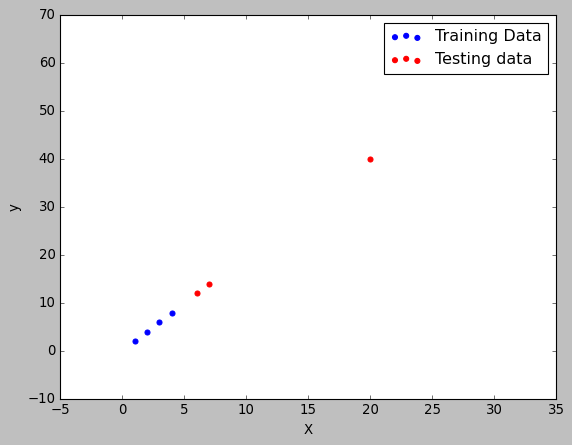

In [39]:
# Example 1 visualization
# Before Model Prediction
plt.style.use("classic")
plt.scatter(x, y , color = "blue", label = 'Training Data')
plt.scatter(x_test, y_test , color = "red", label = "Testing data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

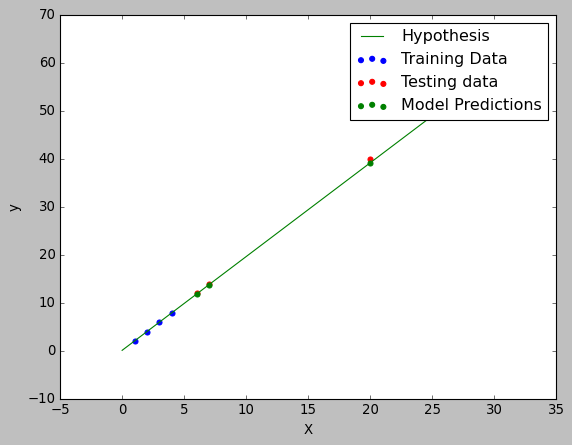

In [40]:
# After Model Prediction
plt.scatter(x, y, color = "blue", label = "Training Data")
plt.scatter(x_test, y_test, color = "red", label = "Testing data")
plt.scatter(x_test,y_pred , color = "green", label = "Model Predictions")
plt.plot([0,30],[lr.predict(0), lr.predict(30)], color = "green", label = "Hypothesis")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [41]:
# Weights VS Loss Graph
w1 = []
w2 = []
for i in lr.weights:
    w1.append(i[0])
    w2.append(i[1])

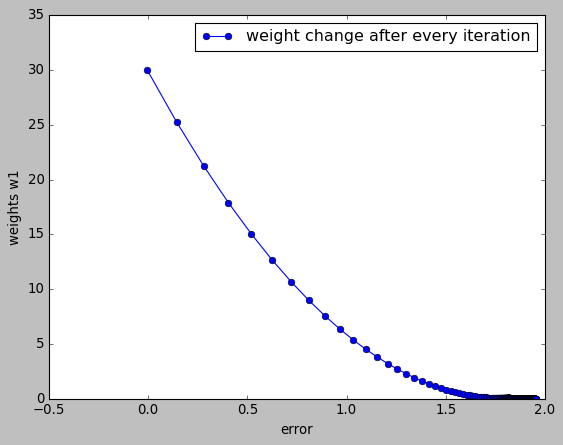

In [46]:
# weights vs loss 
plt.plot(w2, lr.error, marker = "o", label = "weight change after every iteration")
plt.xlabel("error")
plt.ylabel("weights w1")
plt.legend()

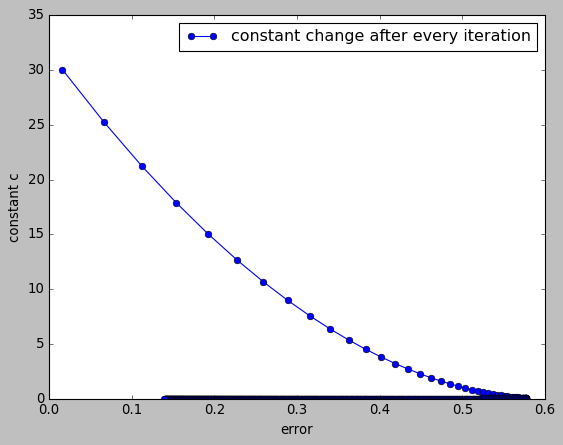

In [47]:
# weights vs loss 
plt.plot(w1, lr.error, marker = "o", label = "constant change after every iteration")
plt.xlabel("error")
plt.ylabel("constant c")
plt.legend()

In [48]:
# Example 2
x = [1,2,3,4] # Training X data
y = [3,5,2,10] # Training y data

In [49]:
lr1 = Linear_Regression()
lr1.fit(x,y)

In [50]:
# Example 2
x_test = [6,10,9,5]
# y_test = We Don't know 
y_pred = []
for i in x_test:
    y_pred.append(lr.predict(i)[0])

In [51]:
print("Y Predicted results : ", y_pred)

Y Predicted results :  [11.855254303535412, 19.665790196579362, 17.713156223318375, 9.902620330274427]


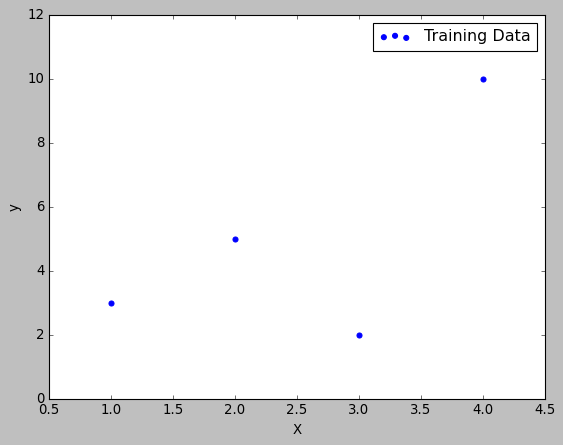

In [52]:
# Example 1 visualization
# Before Model Prediction
plt.style.use("classic")
plt.scatter(x, y , color = "blue", label = 'Training Data')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

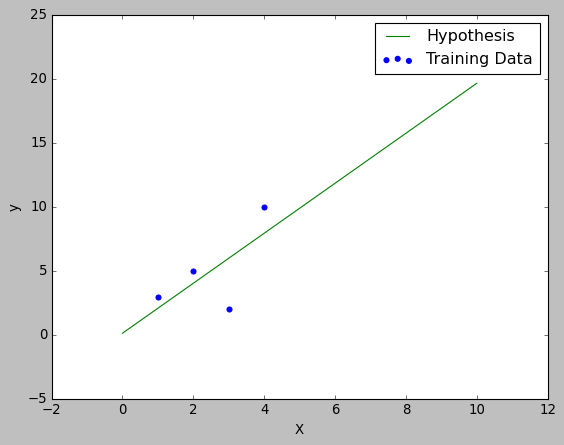

In [57]:
# After Model Prediction
plt.scatter(x, y, color = "blue", label = "Training Data")
plt.plot([0,10],[lr.predict(0), lr.predict(10)], color = "green", label = "Hypothesis")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [58]:
# Weights VS Loss Graph
w1 = []
w2 = []
for i in lr.weights:
    w1.append(i[0])
    w2.append(i[1])

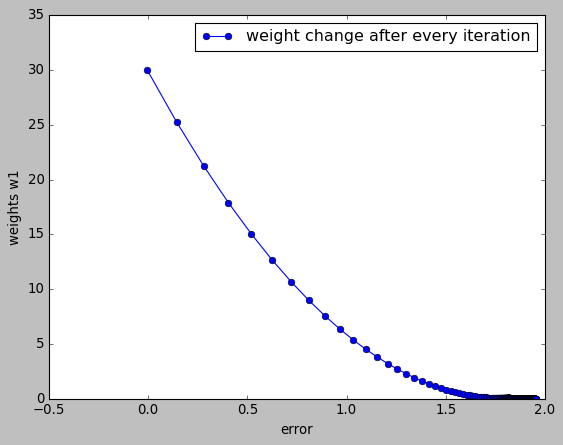

In [59]:
# weights vs loss 
plt.plot(w2, lr.error, marker = "o", label = "weight change after every iteration")
plt.xlabel("error")
plt.ylabel("weights w1")
plt.legend()

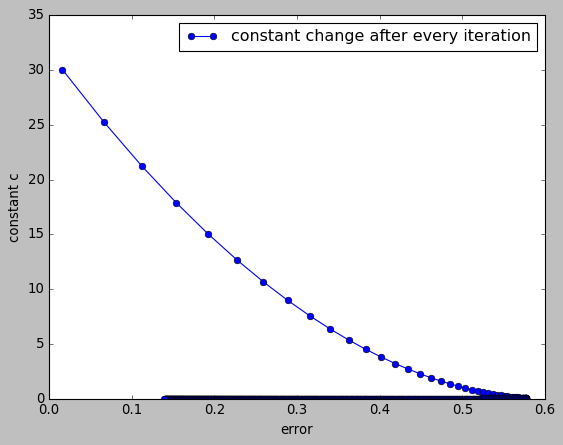

In [60]:
# weights vs loss 
plt.plot(w1, lr.error, marker = "o", label = "constant change after every iteration")
plt.xlabel("error")
plt.ylabel("constant c")
plt.legend()